#### Import necessary libraries

In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read in the Data

In [375]:
league = pd.read_csv('league.csv')

league.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


# Data Overview and Data Clean up

#### Remove gameId and put target variable into own dataframe

In [376]:
target = league['blueWins']
league = league.drop(['gameId'], axis = 1)

#### Compare number of red wins vs number of blue wins

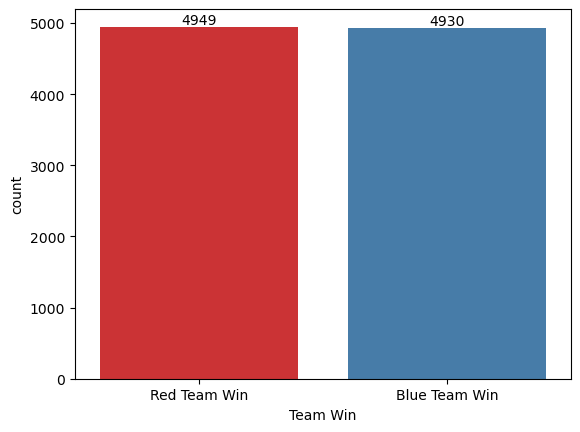

In [377]:
colors = ['red', 'blue']
ax = sns.countplot(x = target, data = league, palette = 'Set1')
ax.bar_label(ax.containers[0])
plt.xticks(ticks = [0,1], labels = ['Red Team Win', 'Blue Team Win'])
plt.xlabel('Team Win')
plt.show()

#### Correlation Heatmap

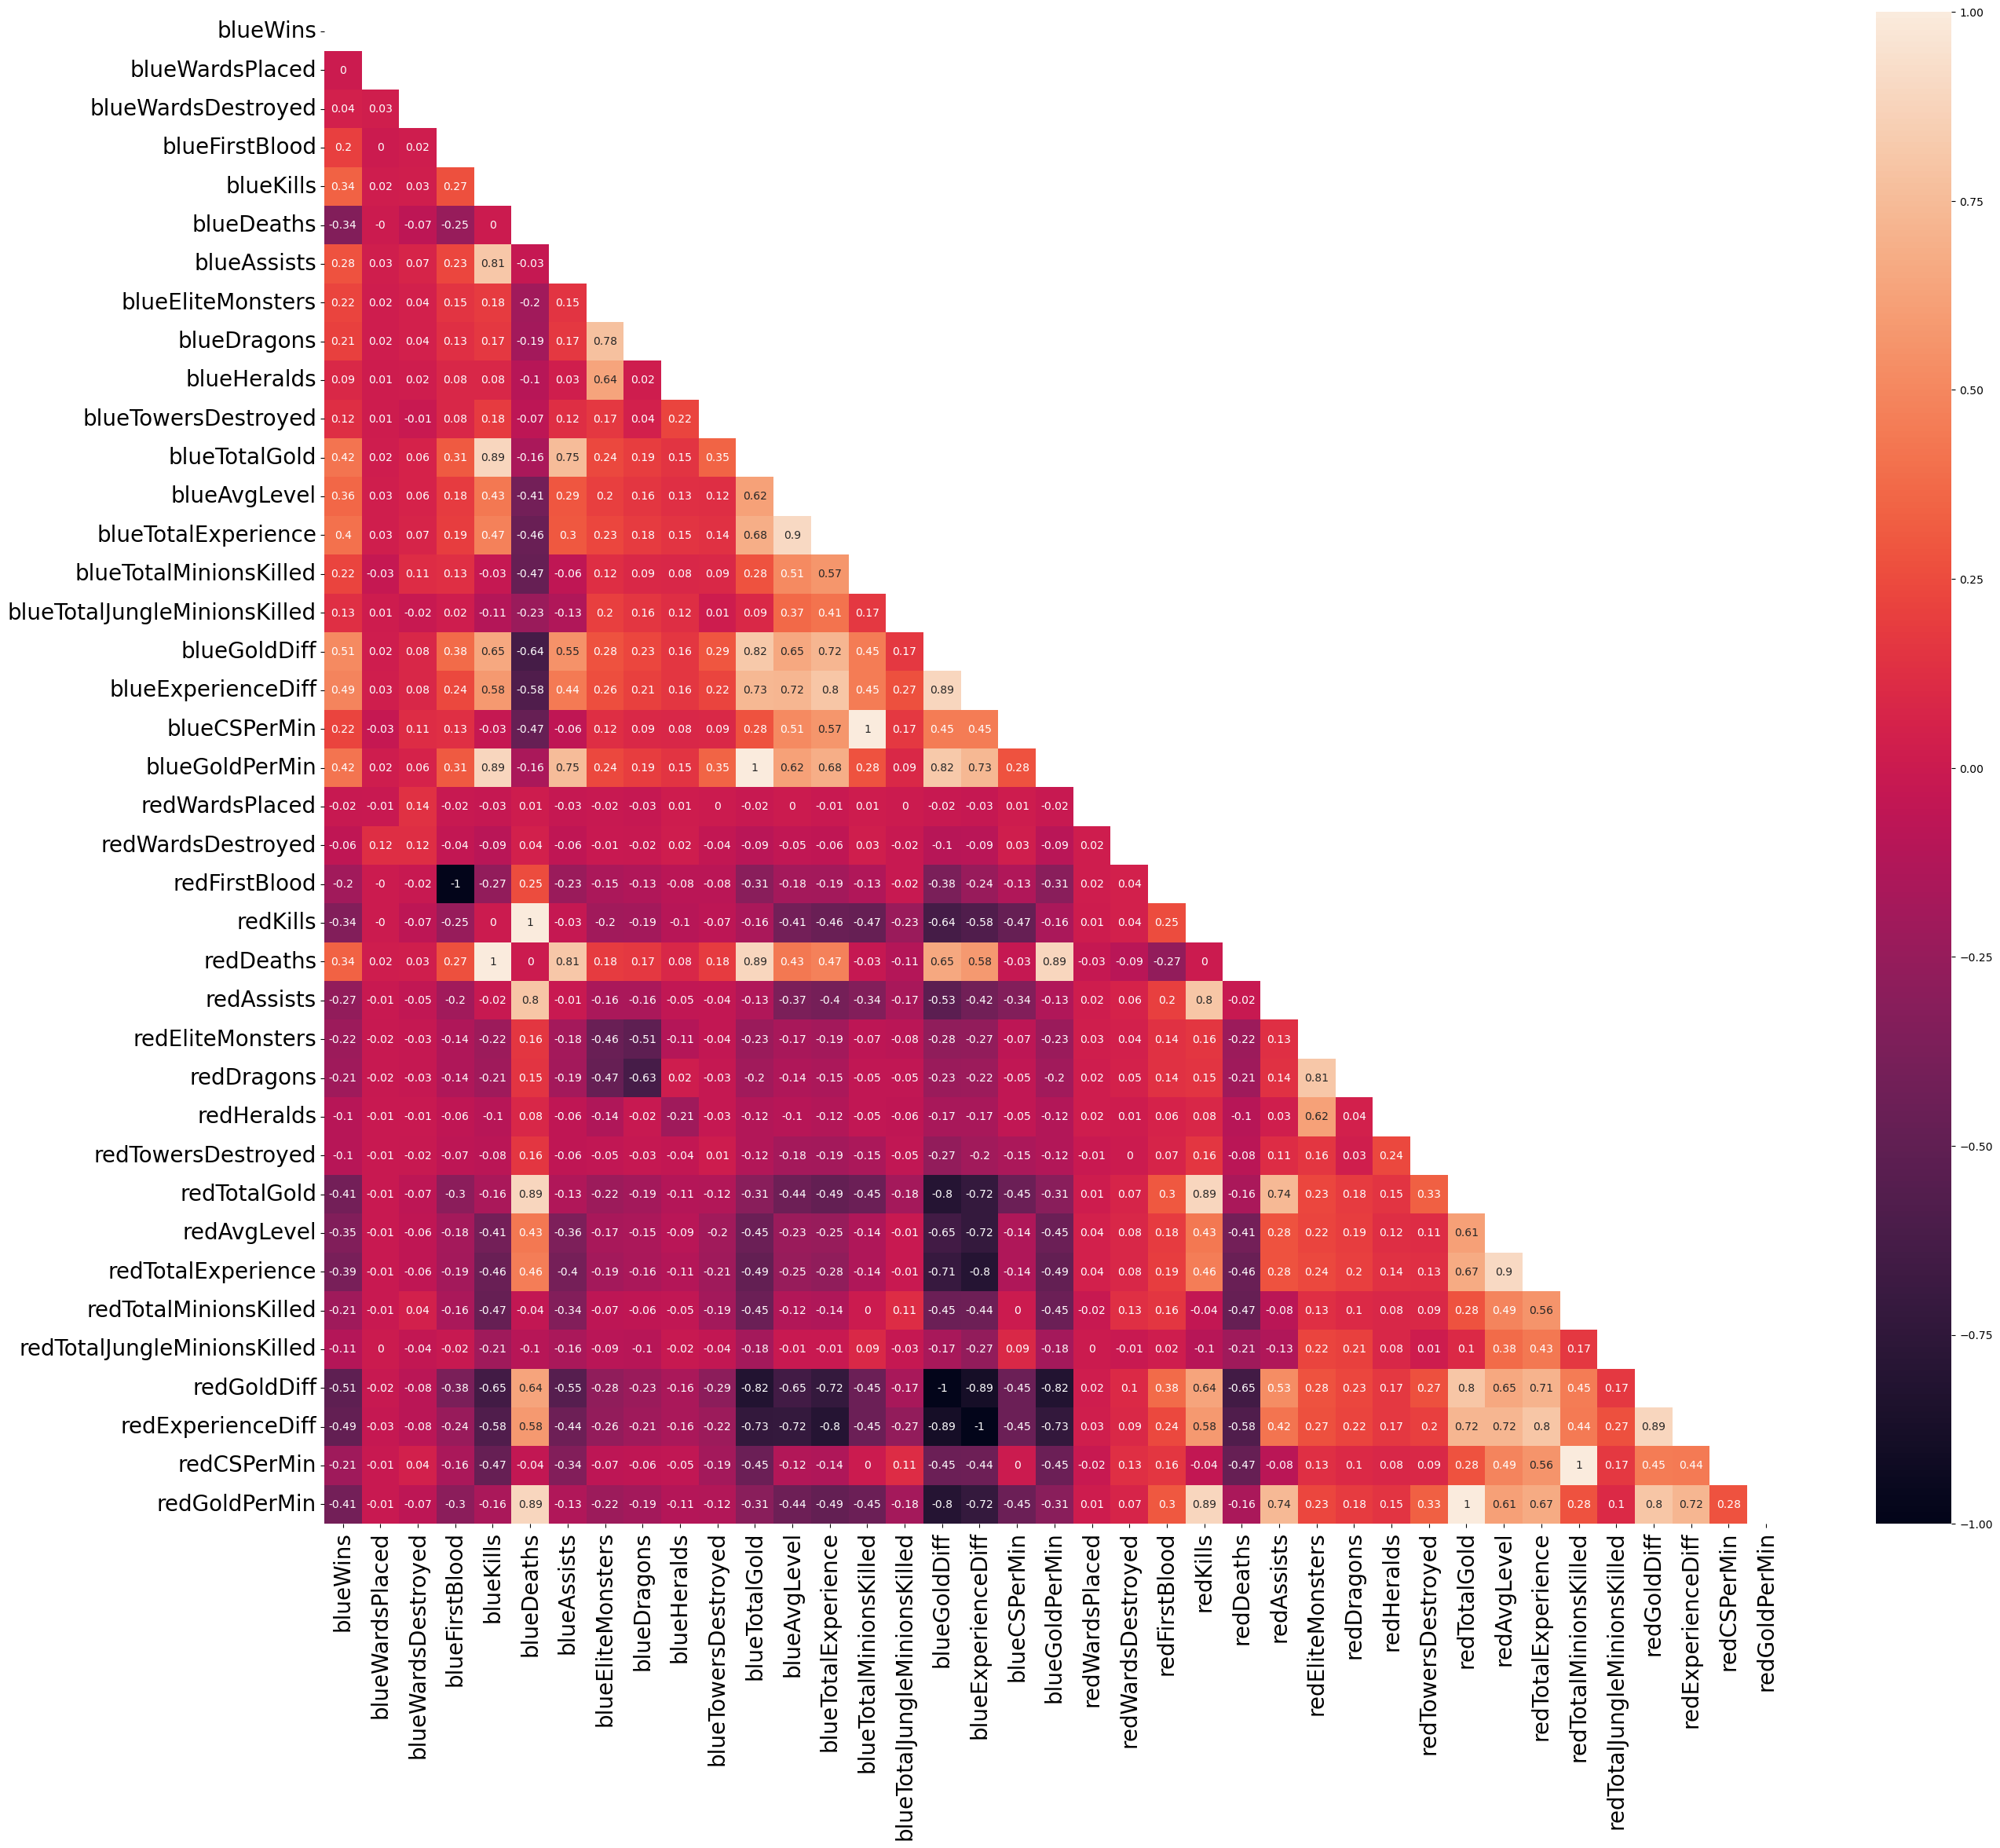

In [378]:
plt.figure(figsize=(30,25))

mask = np.triu(np.ones_like(league.corr()))

corr = sns.heatmap(round(league.corr(),2), annot=True, mask = mask)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### Variance Inflation Factor (VIF)

In [379]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = league.columns
vif_data["VIF"] = [variance_inflation_factor(league.values, i)
                          for i in range(len(league.columns))]
  
print(vif_data)

                         Feature          VIF
0                       blueWins     1.391451
1                blueWardsPlaced     1.026960
2             blueWardsDestroyed     1.068408
3                 blueFirstBlood  1299.014983
4                      blueKills          inf
5                     blueDeaths          inf
6                    blueAssists     3.770062
7              blueEliteMonsters          inf
8                    blueDragons          inf
9                    blueHeralds          inf
10           blueTowersDestroyed     1.611945
11                 blueTotalGold          inf
12                  blueAvgLevel     5.376657
13           blueTotalExperience          inf
14        blueTotalMinionsKilled          inf
15  blueTotalJungleMinionsKilled     1.858104
16                  blueGoldDiff          inf
17            blueExperienceDiff          inf
18                  blueCSPerMin          inf
19                blueGoldPerMin          inf
20                redWardsPlaced  

#### Drop highly correlated predictors

In [380]:
drop_cols = ['blueEliteMonsters', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 
            'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redEliteMonsters',
            'redKills', 'redDeaths', 'redEliteMonsters', 'redTotalGold', 'redAvgLevel', 'redTotalExperience',
            'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

league_select = league.drop(drop_cols, axis=1)

#### Re Run Correlation Heatmap 

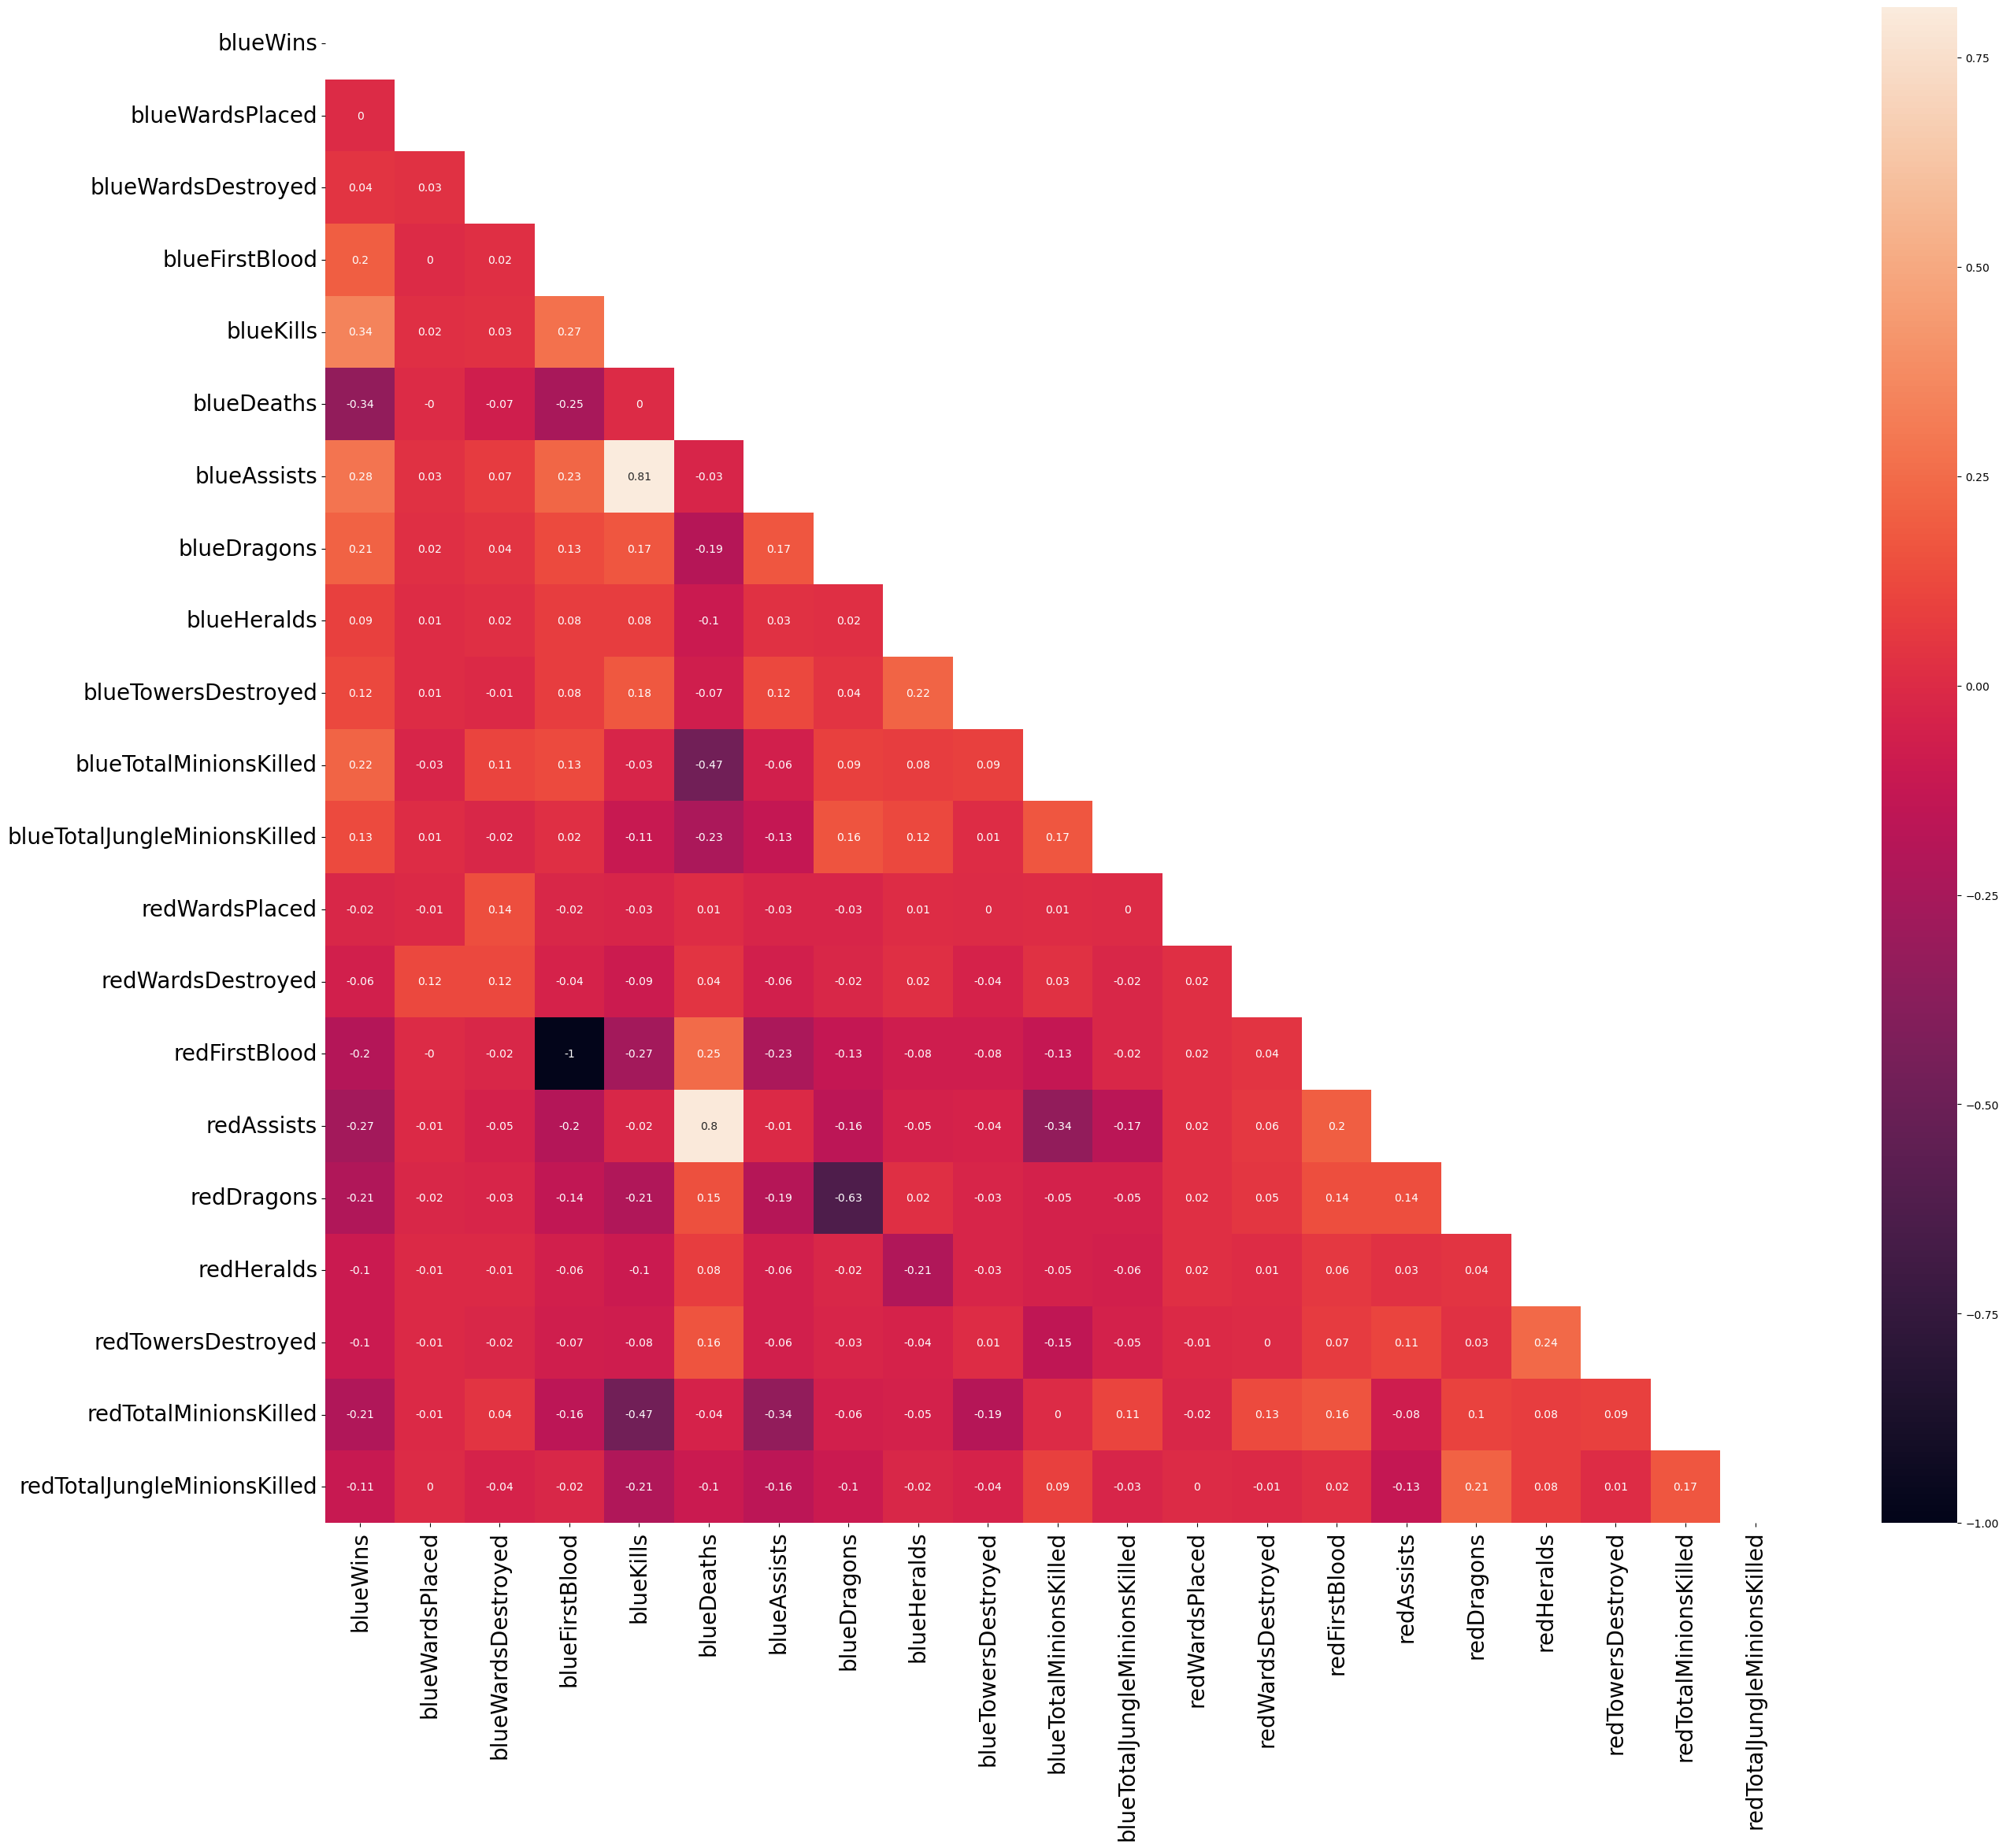

In [381]:
plt.figure(figsize=(30,25))

mask = np.triu(np.ones_like(league_select.corr()))

corr = sns.heatmap(round(league_select.corr(),2), annot=True, mask = mask)


plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### Re Run VIF table -- keep blue first blood and red first blood

In [382]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data2 = pd.DataFrame()
vif_data2['Feature'] = league_select.columns
vif_data2["VIF"] = [variance_inflation_factor(league_select.values, i)
                          for i in range(len(league_select.columns))]
  
print(vif_data2)

                         Feature         VIF
0                       blueWins    1.359742
1                blueWardsPlaced    1.020196
2             blueWardsDestroyed    1.065591
3                 blueFirstBlood  193.306875
4                      blueKills    3.771700
5                     blueDeaths    3.590819
6                    blueAssists    3.126714
7                    blueDragons    1.752699
8                    blueHeralds    1.126004
9            blueTowersDestroyed    1.110809
10        blueTotalMinionsKilled    1.361691
11  blueTotalJungleMinionsKilled    1.150192
12                redWardsPlaced    1.026212
13             redWardsDestroyed    1.059635
14                 redFirstBlood  190.244680
15                    redAssists    2.974859
16                    redDragons    1.782268
17                    redHeralds    1.125959
18            redTowersDestroyed    1.101551
19         redTotalMinionsKilled    1.389518
20   redTotalJungleMinionsKilled    1.143873


# Exploratory Data Analysis (EDA)

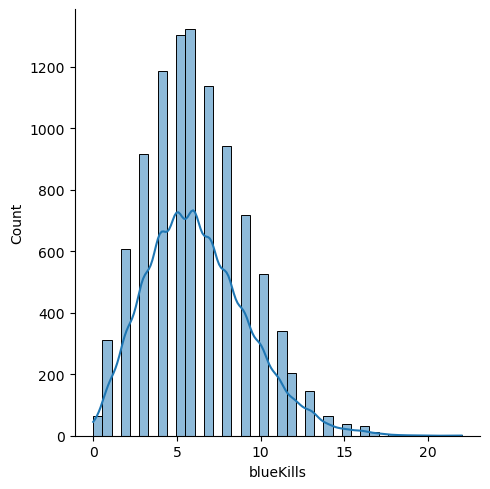

In [383]:
# Density of blue kills

sns.displot(league['blueKills'], bins = 40, kde = True)
fig.tight_layout()

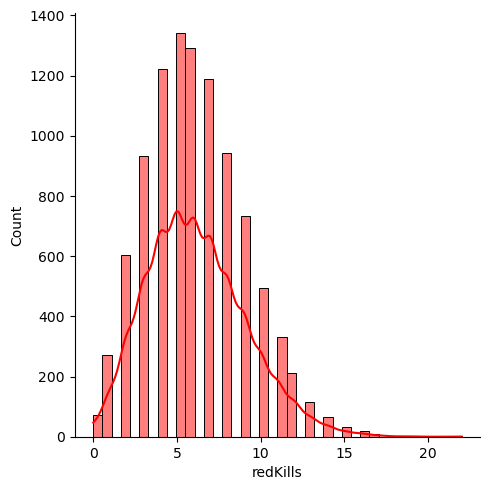

In [384]:
# Density of Red Kills

sns.displot(league['redKills'], bins = 40, kde = True, color = 'r')
fig.tight_layout()

<AxesSubplot:xlabel='blueKills'>

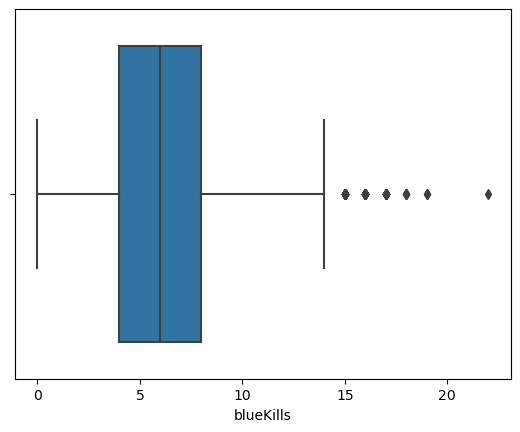

In [385]:
sns.boxplot(x = league['blueKills'])

Corr Between blue kills & blue wins:  0.3373576105342439


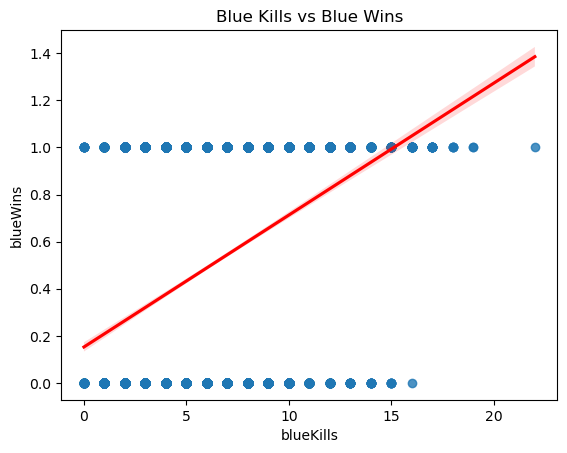

In [386]:
# Scatter plot of blue kills vs blue wins
# as the number of blue kills increaes, the number of blue wins increases

sns.regplot(data=league, x='blueKills', y='blueWins', line_kws={"color": "red"})
plt.title('Blue Kills vs Blue Wins')
fig.tight_layout()

print('Corr Between blue kills & blue wins: ', league['blueKills'].corr(league['blueWins']))

Corr Between blue wards placed & blue wins:  8.695109201390567e-05


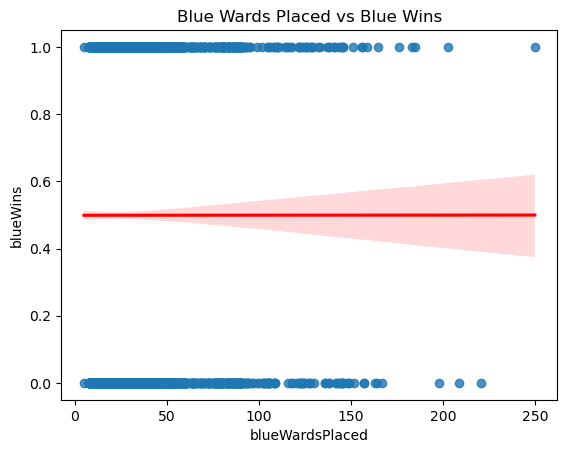

In [387]:
# Scatter plot of blue wards placed vs blue wins

sns.regplot(data=league, x='blueWardsPlaced', y='blueWins', line_kws={"color": "red"})
plt.title('Blue Wards Placed vs Blue Wins')
fig.tight_layout()

print('Corr Between blue wards placed & blue wins: ', league['blueWardsPlaced'].corr(league['blueWins']))

Corr Between blue total minions killed & blue wins:  0.22490947260651567


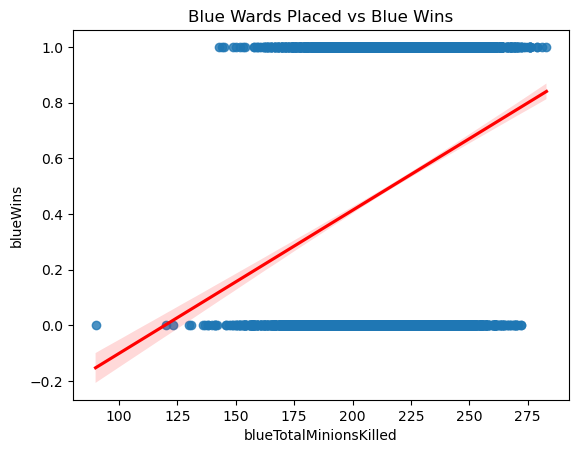

In [388]:
# Scatter plot of blue wards placed vs blue wins

sns.regplot(data=league, x='blueTotalMinionsKilled', y='blueWins', line_kws={"color": "red"})
plt.title('Blue Wards Placed vs Blue Wins')
fig.tight_layout()

print('Corr Between blue total minions killed & blue wins: ', league['blueTotalMinionsKilled'].corr(league['blueWins']))

#### Bar chart of correlations

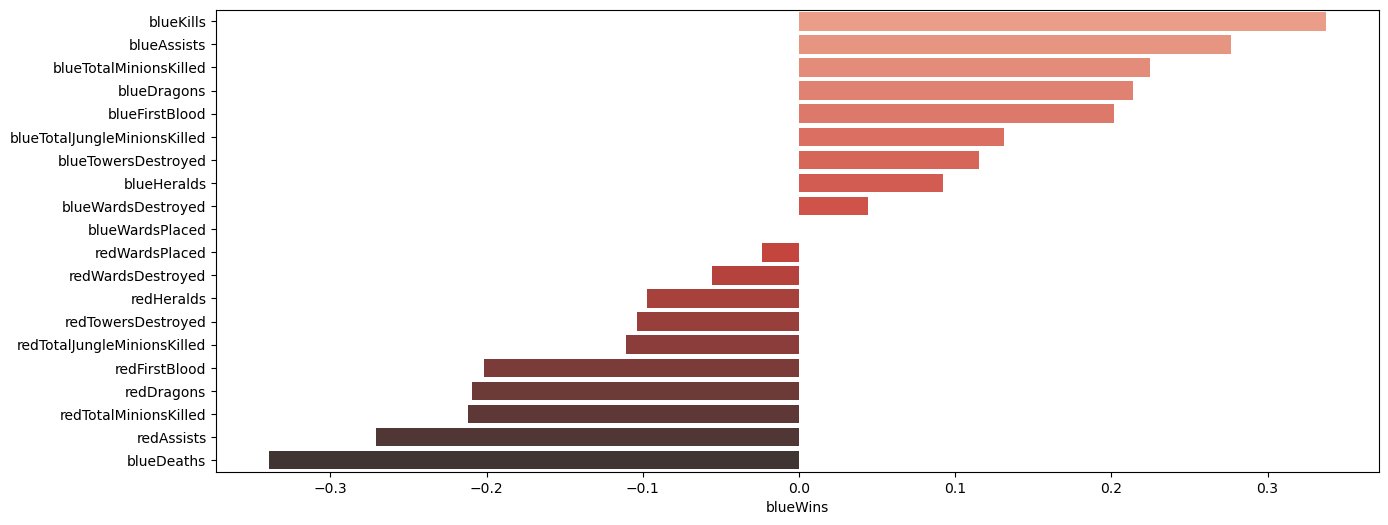

In [396]:
# blue kills and blue deaths have the highest impact on blue wins

plt.figure(figsize=(15,6))
all_correlations = league_select.corr()['blueWins'].drop(['blueWins'])
all_correlations = all_correlations.sort_values(ascending=False)
all_correlations

pal = sns.color_palette("Reds_d", len(all_correlations))
rank = all_correlations.argsort().argsort() 

sns.barplot(y=all_correlations.index, x=all_correlations, palette=np.array(pal[::-1])[rank])
plt.show()

# Model

#### Create Train and Test Sets

In [409]:
from sklearn.model_selection import train_test_split

league_select_predictors = league_select.drop(['blueWins'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(league_select_predictors, target, test_size = 0.3, random_state = 42)



2970    1
4423    0
3928    1
3263    0
2628    0
       ..
5734    1
5191    1
5390    1
860     0
7270    0
Name: blueWins, Length: 6915, dtype: int64

#### Training the Model

In [410]:
from sklearn.linear_model import LogisticRegression

# create the lr model
lr = LogisticRegression()

# train the model on the training data
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

#### Model Accuracy

In [411]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.72


In [413]:
# Classification Report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1480
           1       0.72      0.72      0.72      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



#### Heat Map of Actual vs Predictions

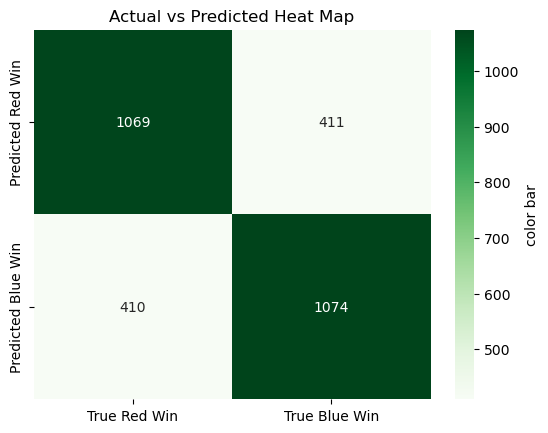

In [429]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap="Greens", annot=True, fmt = 'g',
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=["True Red Win","True Blue Win"], 
            yticklabels = ["Predicted Red Win","Predicted Blue Win"])
plt.title("Actual vs Predicted Heat Map")
plt.show()